<a href="https://colab.research.google.com/github/nuel071003/JST-Tugas/blob/main/Tugas_JST2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessasry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the Excel file from Google Drive (update with your file path)
file_path = '/content/drive/MyDrive/Nuel_JST/Input_JST.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# Prepare the dataset
X = df[['Jumlah Unit Terjual', 'Harga', 'Kategori Produk (0 = Laptop, 1 = Smartphone, 2 = Televisi)', 'Penilaian Pelanggan']]
y = df['Terjual Cepat (1 = Terjual Cepat, 0 = Tidak Terjual Cepat)']

In [ ]:
# Convert 'y' to categorical data for multi-class classification
y_categorical = tf.keras.utils.to_categorical(y, num_classes=2)
# 2 classes: Terjual cepat (1) dan Tidak Terjual Cepat (0)

In [ ]:
# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [ ]:
# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the neurak network model with the specified architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)), # Input layer with 4 neurons
    tf.keras.layers.Dense(5, activation='relu'), # Hidden layer 1 with 5 neurons
    tf.keras.layers.Dense(3, activation='relu'),  # Hidden layer 2 with 3 neurons
    tf.keras.layers.Dense(2, activation='softmax') # Output Layer with 2 neurons (softmax for multi-class classifications)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the Model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3329 - loss: 0.8394 - val_accuracy: 0.4167 - val_loss: 0.8183
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4687 - loss: 0.7513 - val_accuracy: 0.5000 - val_loss: 0.7512
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5999 - loss: 0.7173 - val_accuracy: 0.5625 - val_loss: 0.6921
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6357 - loss: 0.6409 - val_accuracy: 0.5833 - val_loss: 0.6434
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6375 - loss: 0.6392 - val_accuracy: 0.6458 - val_loss: 0.6026
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6941 - loss: 0.5834 - val_accuracy: 0.6458 - val_loss: 0.5675
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7406 - loss: 0.5506 - val_accuracy: 0.6875 - val_loss: 0.5354
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7174 - loss: 0.5509 - val_accuracy: 0.7083 - val_loss

In [ ]:
# Evalute the Model on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy :.4f}')
print(f'Test loss: {loss :.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8597 - loss: 0.3081 
Test Accuracy: 0.8833
Test loss: 0.2873


In [ ]:
# Plotting the training and validation loss and accurancy
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

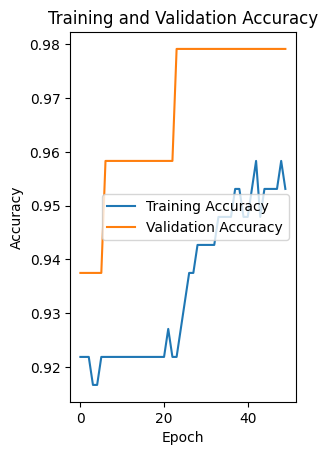

In [ ]:
# plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

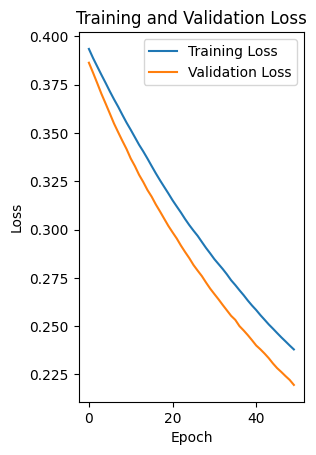

In [ ]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [ ]:
# Show the plots
plt.show()

In [ ]:
# ---- Predict on new data ----
# Example: Data baru yang ingin diujicobakan
new_data = pd.DataFrame({
  'Jumlah Unit Terjual': [200, 50, 400], # Jumlah unit terjual
  'Harga': [2500, 1500, 3500], # Harga yang sudah disesuaikan dengan kategori
  'Kategori Produk (0 = Laptop, 1 = Smartphone, 2 = Televisi)': [0, 1, 2], # Add missing feature, assuming you have the category info
  'Penilaian Pelanggan': [4.5, 3.0, 5.0] # Correct the typo in the column name
})

In [ ]:
# Standardize the new data
new_data_scaled = scaler.transform(new_data)

In [ ]:
# Predict using the trained model
predictions = model.predict(new_data_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [ ]:
# Get class labels for each prediction
predicted_classes = np.argmax(predictions, axis=1) # convert from one-hot encoded to class labels (0 or 1)

In [ ]:
# Map class labels to 'Terjual Cepat' or 'Tidak Terjual Cepat'
class_labels = ['Tidak Terjual Cepat', 'Terjual Cepat']
predicted_labels = [class_labels[cls] for cls in predicted_classes]
new_data['Prediksi'] = predicted_labels
print("\nPrediksi untuk data baru:")
print(new_data)


Prediksi untuk data baru:
   Jumlah Unit Terjual  Harga  \
0                  200   2500   
1                   50   1500   
2                  400   3500   

   Kategori Produk (0 = Laptop, 1 = Smartphone, 2 = Televisi)  \
0                                                  0            
1                                                  1            
2                                                  2            

   Penilaian Pelanggan             Prediksi  
0                  4.5        Terjual Cepat  
1                  3.0  Tidak Terjual Cepat  
2                  5.0        Terjual Cepat  
